## Sample 4A-3 Kolmogorov-Smirnov Test, a case from binary stars

Poor vs. Weak: KstestResult(statistic=0.17150234741784037, pvalue=0.03144774434688968)
Poor vs. Rich: KstestResult(statistic=0.37271778821074597, pvalue=7.2901975741723746e-06)
Weak vs. Rich: KstestResult(statistic=0.34703703703703703, pvalue=0.00028064263932681133)


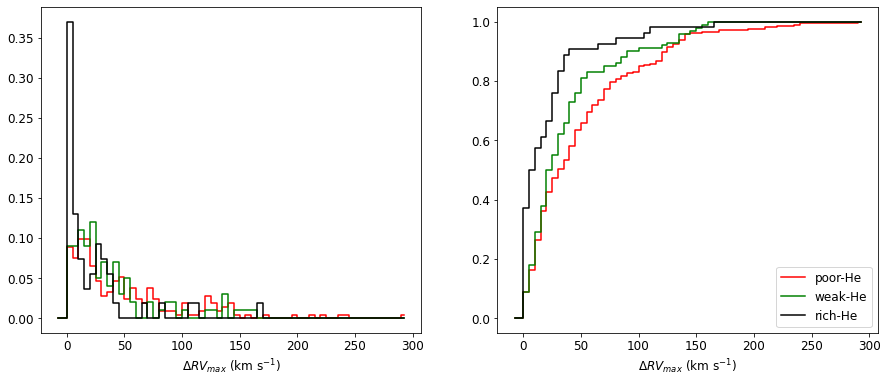

In [27]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

from scipy.stats import kstest, ks_2samp

import pandas as pd

drvmax_hepoor = pd.read_csv('drvmax_hepoor.csv')
drvmax_heweak = pd.read_csv('drvmax_heweak.csv')
drvmax_hehigh = pd.read_csv('drvmax_hehigh.csv')

h_phe,xedge = np.histogram(drvmax_hepoor['drvmax'],np.arange(-10,300,5))
h_whe,xedge = np.histogram(drvmax_heweak['drvmax'],np.arange(-10,300,5))
h_hhe,xedge = np.histogram(drvmax_hehigh['drvmax'],np.arange(-10,300,5))

fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121)
ax.step((xedge[1:]+xedge[:-1])/2.,(h_phe)/np.sum(h_phe),'r-',where='mid')
ax.step((xedge[1:]+xedge[:-1])/2.,(h_whe)/np.sum(h_whe),'g-',where='mid')
ax.step((xedge[1:]+xedge[:-1])/2.,(h_hhe)/np.sum(h_hhe),'k-',where='mid')
ax.set_xlabel(r'$\Delta RV_{max}$ (km s$^{-1}$)',fontsize=12)

ax = fig.add_subplot(122)
e1, = ax.step((xedge[1:]+xedge[:-1])/2.,np.cumsum(h_phe)/np.sum(h_phe),'r-',where='mid')
e2, = ax.step((xedge[1:]+xedge[:-1])/2.,np.cumsum(h_whe)/np.sum(h_whe),'g-',where='mid')
e4, = ax.step((xedge[1:]+xedge[:-1])/2.,np.cumsum(h_hhe)/np.sum(h_hhe),'k-',where='mid')
plt.legend([e1,e2,e4],['poor-He','weak-He','rich-He'],fontsize=12)
ax.set_xlabel(r'$\Delta RV_{max}$ (km s$^{-1}$)',fontsize=12)

print('Poor vs. Weak:',ks_2samp(drvmax_hepoor['drvmax'],drvmax_heweak['drvmax']))
print('Poor vs. Rich:',ks_2samp(drvmax_hepoor['drvmax'],drvmax_hehigh['drvmax']))
print('Weak vs. Rich:',ks_2samp(drvmax_heweak['drvmax'],drvmax_hehigh['drvmax']))